In [ ]:
import pandas as pd
import numpy as np

# Assumptions (use the assumptions from Tab 2)
revenue_growth_rate = 0.20  # 20%
interest_rate = 0.113  # 11.3%
refinanced_rate = 0.06  # 6%
interest_savings = 53  # ₹53 crore from refinancing
tax_rate = 0.30  # 30%
ipp_margin = 0.85  # 85% for IPP projects

# Historical data (for FY2022 as base, previous years are needed but we'll use FY2022 as base)
base_revenue = 434  # ₹434 crore in FY2022
base_ipp_revenue = base_revenue * 0.121  # 12.1% IPP share in FY2022
base_ebitda = 250  # ₹250 crore in FY2022 EBITDA
base_interest_expense = 53  # ₹53 crore in FY2022
base_net_income = 150  # ₹150 crore in FY2022

# DataFrame setup
years = ['FY2023', 'FY2024', 'FY2025', 'FY2026', 'FY2027']
revenues = []
ipp_revenues = []
total_revenues = []
ebitda = []
net_incomes = []
net_profit_margins = []

# Loop for forecasting the next 5 years
for year in years:
    # Revenue forecast (simple 20% growth)
    revenue = base_revenue * (1 + revenue_growth_rate)
    revenues.append(revenue)

    # IPP Revenue (calculating based on IPP margin and share of total revenue)
    ipp_revenue = revenue * 0.35  # Assuming 35% of revenue comes from IPP in the base case
    ipp_revenues.append(ipp_revenue)

    # Total Revenue (from all streams)
    total_revenue = revenue + ipp_revenue
    total_revenues.append(total_revenue)

    # EBITDA (85% margin for IPP projects)
    ipp_ebitda = ipp_revenue * ipp_margin
    other_ebitda = (revenue - ipp_revenue) * 0.2  # Assume 20% margin for other revenue streams (Energy Efficiency, etc.)
    total_ebitda = ipp_ebitda + other_ebitda
    ebitda.append(total_ebitda)

    # Interest Expense (consider refinancing impact, saving ₹53 crore in interest)
    interest_expense = base_interest_expense - interest_savings  # Assuming interest savings from refinancing
    base_interest_expense = interest_expense  # Update for next year

    # Net Income Calculation
    net_income = (total_ebitda - interest_expense) * (1 - tax_rate)
    net_incomes.append(net_income)

    # Net Profit Margin Calculation
    net_profit_margin = (net_income / total_revenue) * 100
    net_profit_margins.append(net_profit_margin)

    # Update base for next year
    base_revenue = revenue

# Create DataFrame
data = {
    'Year': years,
    'Revenue (₹ Crore)': revenues,
    'IPP Revenue (₹ Crore)': ipp_revenues,
    'Total Revenue (₹ Crore)': total_revenues,
    'EBITDA (₹ Crore)': ebitda,
    'Net Income (₹ Crore)': net_incomes,
    'Net Profit Margin (%)': net_profit_margins,
}

df = pd.DataFrame(data)

# Print the entire DataFrame
print(df)

# Save to CSV
df.to_csv('financial_model.csv', index=False)

print("Financial Model CSV has been successfully created!")


     Year  Revenue (₹ Crore)  IPP Revenue (₹ Crore)  Total Revenue (₹ Crore)  \
0  FY2023          520.80000             182.280000               703.080000   
1  FY2024          624.96000             218.736000               843.696000   
2  FY2025          749.95200             262.483200              1012.435200   
3  FY2026          899.94240             314.979840              1214.922240   
4  FY2027         1079.93088             377.975808              1457.906688   

   EBITDA (₹ Crore)  Net Income (₹ Crore)  Net Profit Margin (%)  
0        222.642000            155.849400              22.166667  
1        267.170400            224.119280              26.563985  
2        320.604480            298.623136              29.495531  
3        384.725376            380.607763              31.327747  
4        461.670451            471.569316              32.345645  
Financial Model CSV has been successfully created!


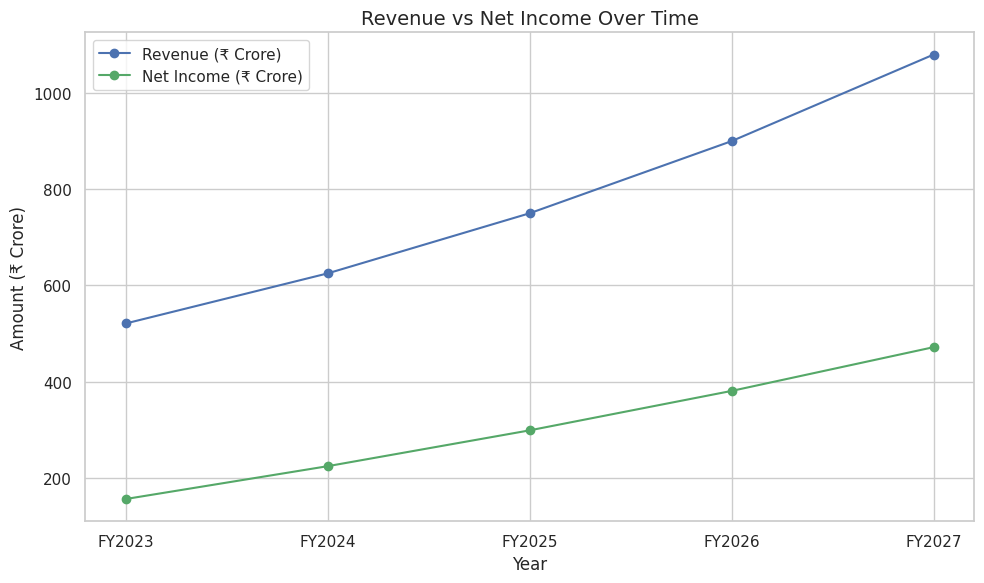

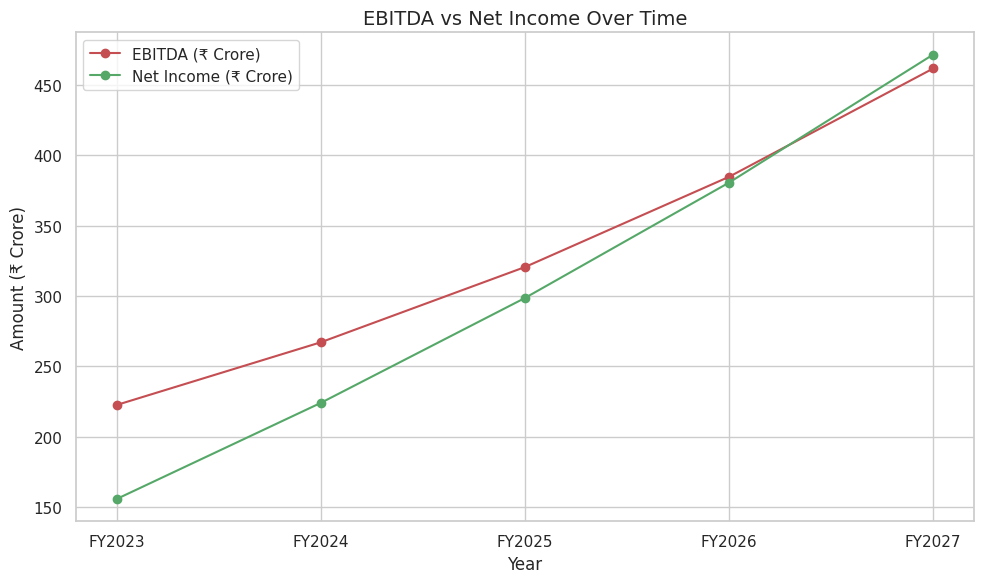

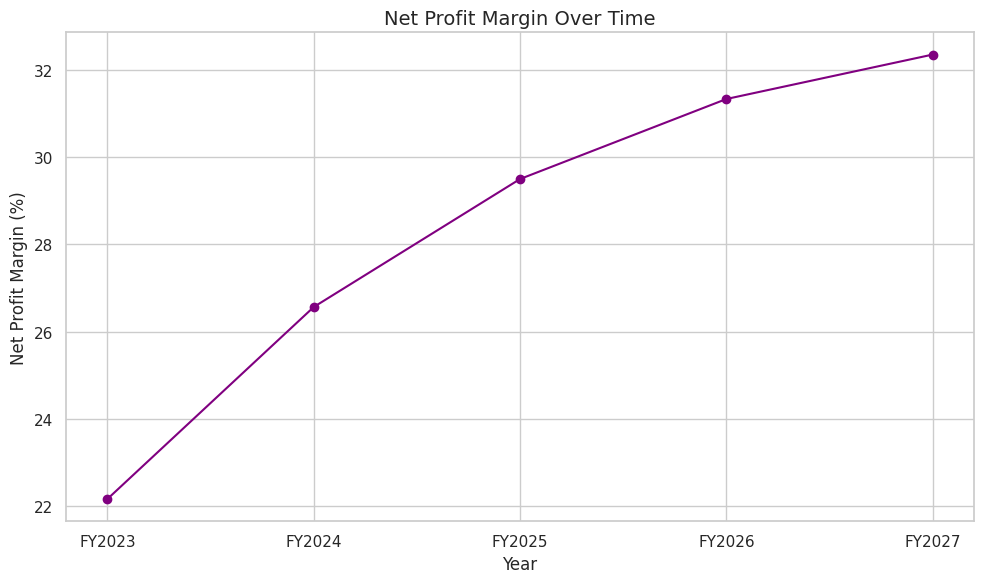

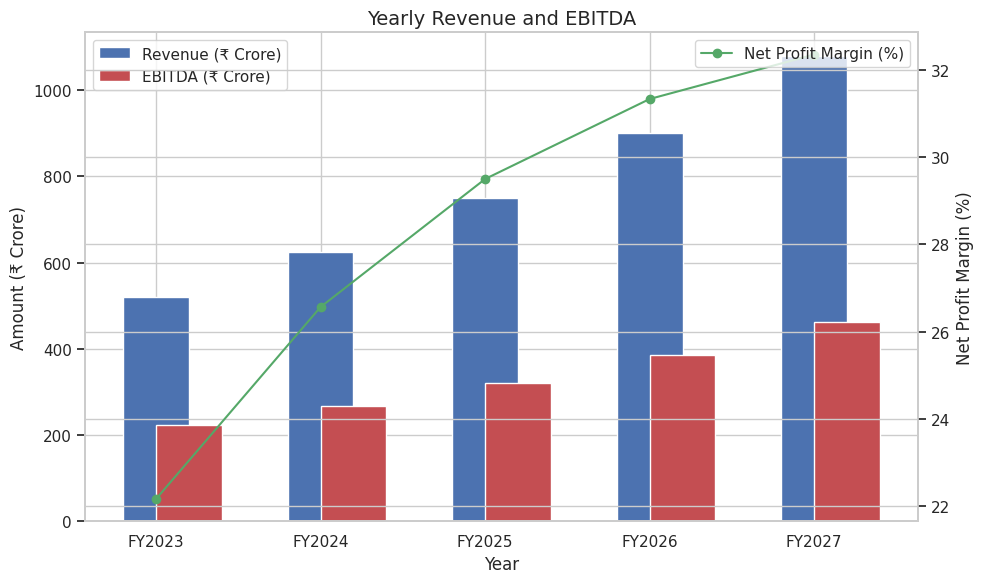

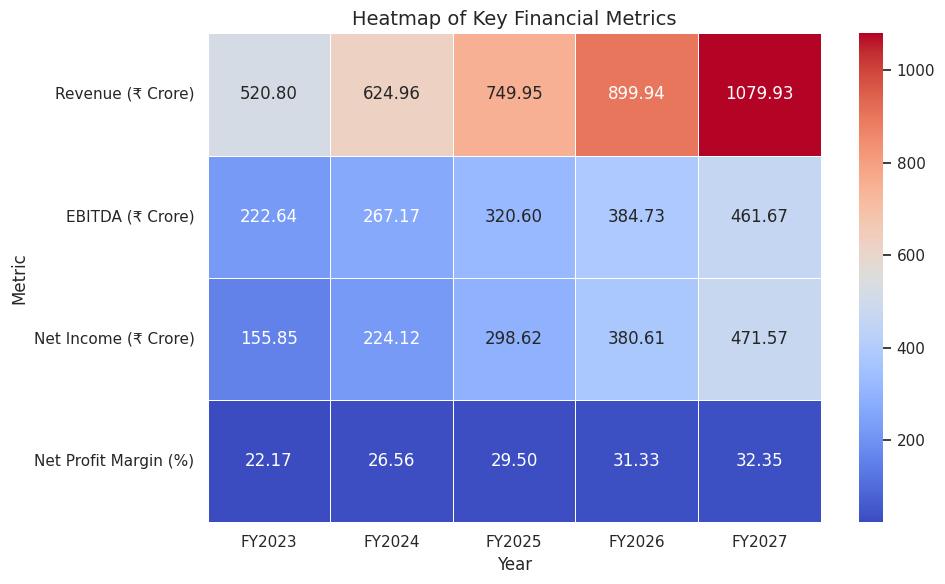

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the financial model CSV generated earlier
df = pd.read_csv('financial_model.csv')

# Set Seaborn style for plots
sns.set(style="whitegrid")

# Plot 1: Revenue vs Net Income (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue (₹ Crore)'], marker='o', label='Revenue (₹ Crore)', color='b')
plt.plot(df['Year'], df['Net Income (₹ Crore)'], marker='o', label='Net Income (₹ Crore)', color='g')
plt.title('Revenue vs Net Income Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (₹ Crore)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: EBITDA vs Net Income (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['EBITDA (₹ Crore)'], marker='o', label='EBITDA (₹ Crore)', color='r')
plt.plot(df['Year'], df['Net Income (₹ Crore)'], marker='o', label='Net Income (₹ Crore)', color='g')
plt.title('EBITDA vs Net Income Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (₹ Crore)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Net Profit Margin Over Time (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Net Profit Margin (%)'], marker='o', color='purple')
plt.title('Net Profit Margin Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Bar Chart for Yearly Revenue, EBITDA, and Net Profit Margin
df.set_index('Year', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Revenue and EBITDA
ax1.bar(df.index, df['Revenue (₹ Crore)'], width=0.4, label='Revenue (₹ Crore)', align='center', color='b')
ax1.bar(df.index, df['EBITDA (₹ Crore)'], width=0.4, label='EBITDA (₹ Crore)', align='edge', color='r')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Amount (₹ Crore)', fontsize=12)
ax1.set_title('Yearly Revenue and EBITDA', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot Net Profit Margin on secondary axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Net Profit Margin (%)'], color='g', label='Net Profit Margin (%)', marker='o')
ax2.set_ylabel('Net Profit Margin (%)', fontsize=12)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot 5: Heatmap of Yearly Financial Data (Revenue, EBITDA, Net Income, Net Profit Margin)
financial_data = df[['Revenue (₹ Crore)', 'EBITDA (₹ Crore)', 'Net Income (₹ Crore)', 'Net Profit Margin (%)']]
plt.figure(figsize=(10, 6))
sns.heatmap(financial_data.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Key Financial Metrics', fontsize=14)
plt.ylabel('Metric', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()


       Year  Revenue (₹ Crore)  IPP Revenue (₹ Crore)  \
0    FY2023         499.100000             149.730000   
1    FY2024         573.965000             172.189500   
2    FY2025         660.059750             198.017925   
3    FY2026         759.068712             227.720614   
4    FY2027         872.929019             261.878706   
..      ...                ...                    ...   
130  FY2023         542.500000             217.000000   
131  FY2024         678.125000             271.250000   
132  FY2025         847.656250             339.062500   
133  FY2026        1059.570312             423.828125   
134  FY2027        1324.462891             529.785156   

     Total Revenue (₹ Crore)  EBITDA (₹ Crore)  Net Income (₹ Crore)  \
0                 648.830000        232.081500            162.457050   
1                 746.154500        266.893725            223.925607   
2                 858.077675        306.927784            289.049449   
3                 986.78932

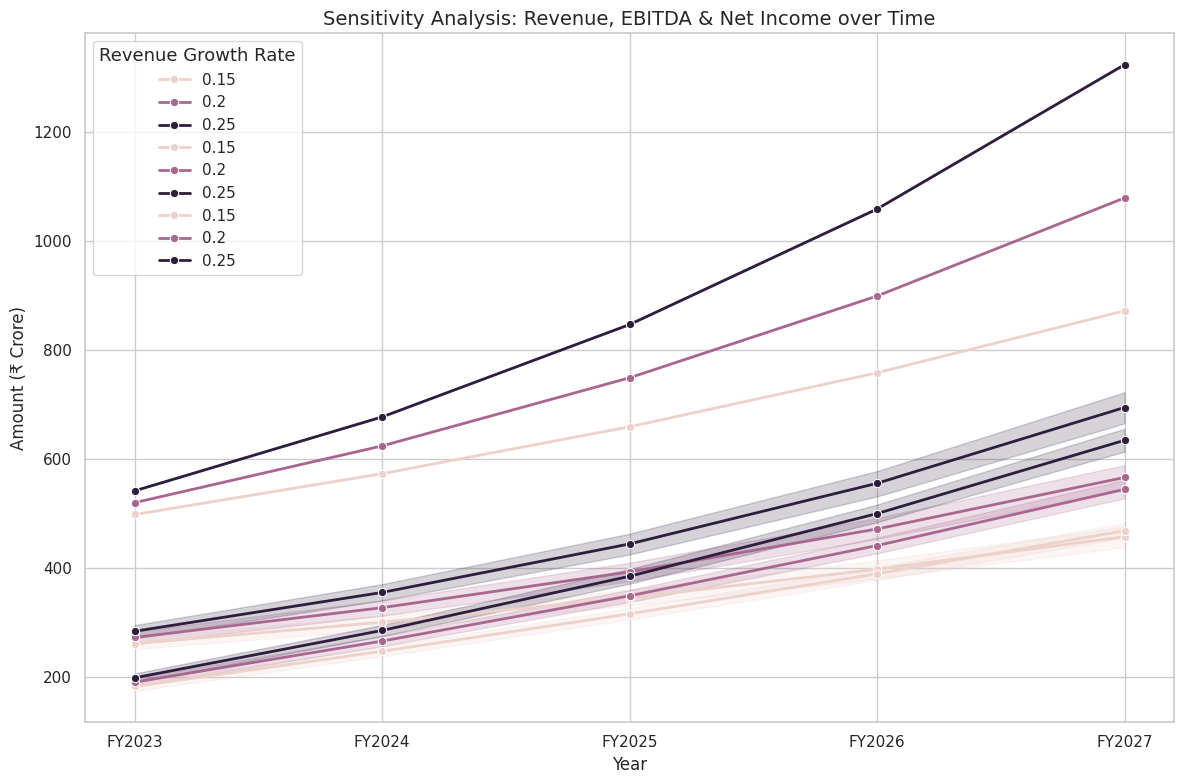

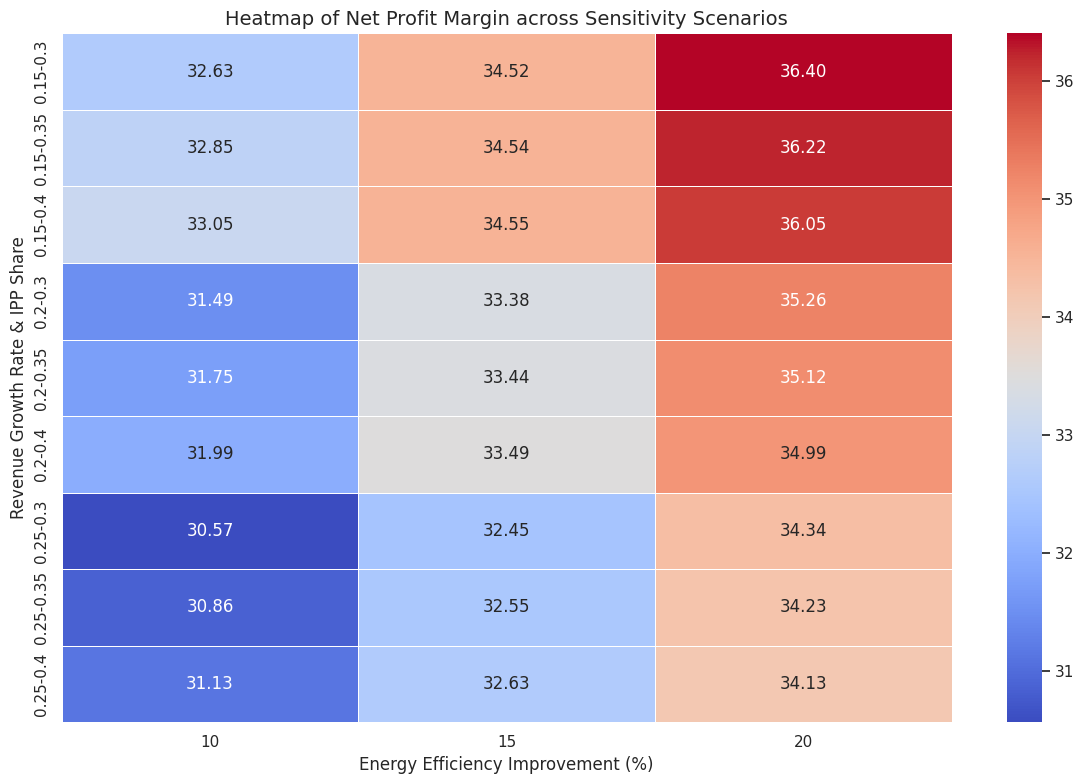

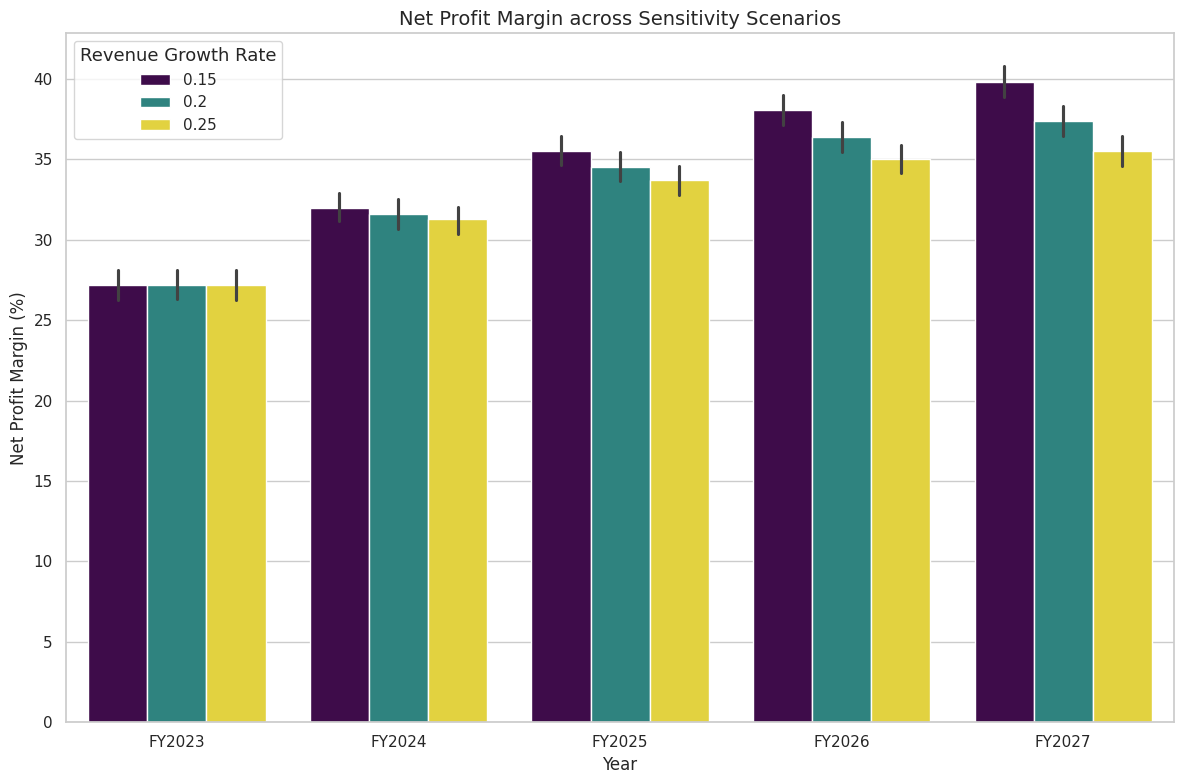

<Figure size 1200x800 with 0 Axes>

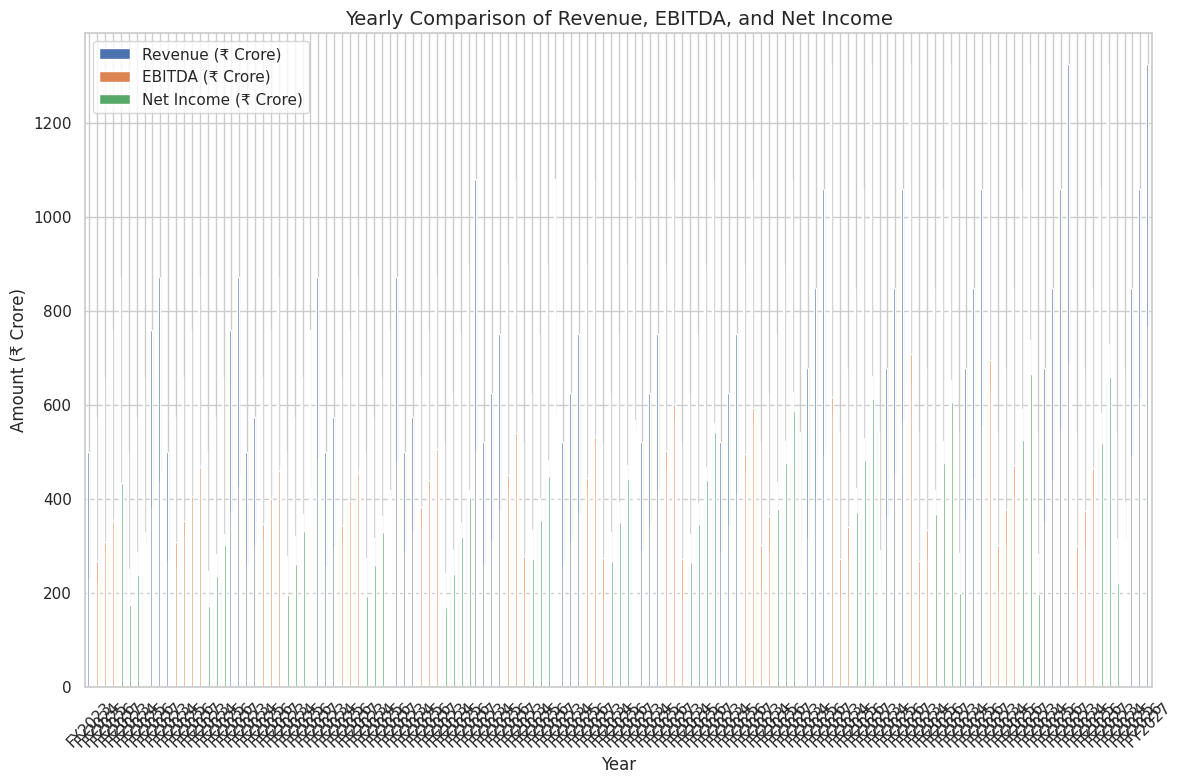

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function for Sensitivity Analysis
def sensitivity_analysis(base_revenue, ipp_margin, revenue_growth_rate, ipp_share, energy_efficiency_improvement, interest_savings, tax_rate, base_interest_expense):
    # DataFrame setup
    years = ['FY2023', 'FY2024', 'FY2025', 'FY2026', 'FY2027']
    revenues = []
    ipp_revenues = []
    total_revenues = []
    ebitda = []
    net_incomes = []
    net_profit_margins = []

    # Loop for forecasting the next 5 years
    for year in years:
        # Revenue forecast (simple growth)
        revenue = base_revenue * (1 + revenue_growth_rate)
        revenues.append(revenue)

        # IPP Revenue (calculating based on IPP margin and share of total revenue)
        ipp_revenue = revenue * ipp_share  # Varying IPP share here
        ipp_revenues.append(ipp_revenue)

        # Total Revenue (from all streams)
        total_revenue = revenue + ipp_revenue
        total_revenues.append(total_revenue)

        # EBITDA (85% margin for IPP projects, and energy efficiency improvement)
        ipp_ebitda = ipp_revenue * ipp_margin
        other_ebitda = (revenue - ipp_revenue) * (0.2 + (energy_efficiency_improvement / 100))  # Varying energy efficiency margin
        total_ebitda = ipp_ebitda + other_ebitda
        ebitda.append(total_ebitda)

        # Interest Expense (consider refinancing impact, saving ₹53 crore in interest)
        interest_expense = base_interest_expense - interest_savings
        base_interest_expense = interest_expense  # Update for next year

        # Net Income Calculation
        net_income = (total_ebitda - interest_expense) * (1 - tax_rate)
        net_incomes.append(net_income)

        # Net Profit Margin Calculation
        net_profit_margin = (net_income / total_revenue) * 100
        net_profit_margins.append(net_profit_margin)

        # Update base for next year
        base_revenue = revenue

    # Create DataFrame for this scenario
    data = {
        'Year': years,
        'Revenue (₹ Crore)': revenues,
        'IPP Revenue (₹ Crore)': ipp_revenues,
        'Total Revenue (₹ Crore)': total_revenues,
        'EBITDA (₹ Crore)': ebitda,
        'Net Income (₹ Crore)': net_incomes,
        'Net Profit Margin (%)': net_profit_margins,
    }

    return pd.DataFrame(data)

# Initial assumptions (base case from previous code)
base_revenue = 434  # ₹434 crore in FY2022
base_interest_expense = 53  # ₹53 crore in FY2022
tax_rate = 0.30  # 30%
interest_savings = 53  # ₹53 crore from refinancing
ipp_margin = 0.85  # 85% for IPP projects

# Sensitivity Analysis Scenarios:
scenarios = {
    'Revenue Growth Rate': [0.15, 0.20, 0.25],  # 15%, 20%, 25%
    'IPP Share': [0.30, 0.35, 0.40],  # 30%, 35%, 40%
    'Energy Efficiency Improvement': [10, 15, 20],  # 10%, 15%, 20%
}

# DataFrame for storing all scenarios results
all_scenarios_df = pd.DataFrame()

# Loop through all combinations of the sensitivity scenarios
for revenue_growth_rate in scenarios['Revenue Growth Rate']:
    for ipp_share in scenarios['IPP Share']:
        for energy_efficiency_improvement in scenarios['Energy Efficiency Improvement']:
            # Get the sensitivity analysis result for this scenario
            result_df = sensitivity_analysis(base_revenue, ipp_margin, revenue_growth_rate, ipp_share, energy_efficiency_improvement, interest_savings, tax_rate, base_interest_expense)
            result_df['Revenue Growth Rate'] = revenue_growth_rate
            result_df['IPP Share'] = ipp_share
            result_df['Energy Efficiency Improvement (%)'] = energy_efficiency_improvement

            # Concatenate the result to the overall DataFrame
            all_scenarios_df = pd.concat([all_scenarios_df, result_df], ignore_index=True)

# Save the full sensitivity analysis results to CSV
all_scenarios_df.to_csv('sensitivity_analysis.csv', index=False)

# Print the full sensitivity analysis DataFrame
print(all_scenarios_df)

# Visualization for Sensitivity Analysis:

# Set Seaborn style for plots
sns.set(style="whitegrid")

# Plot 1: Line Plot for Revenue, EBITDA, Net Income, and Net Profit Margin
plt.figure(figsize=(12, 8))

# Plot Revenue, EBITDA, Net Income for each scenario
sns.lineplot(x="Year", y="Revenue (₹ Crore)", hue="Revenue Growth Rate", data=all_scenarios_df, marker='o', lw=2)
sns.lineplot(x="Year", y="EBITDA (₹ Crore)", hue="Revenue Growth Rate", data=all_scenarios_df, marker='o', lw=2)
sns.lineplot(x="Year", y="Net Income (₹ Crore)", hue="Revenue Growth Rate", data=all_scenarios_df, marker='o', lw=2)

# Add title and labels
plt.title('Sensitivity Analysis: Revenue, EBITDA & Net Income over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (₹ Crore)', fontsize=12)
plt.legend(title='Revenue Growth Rate', title_fontsize='13', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Heatmap of Net Profit Margin across different scenarios (Revenue Growth Rate, IPP Share, Energy Efficiency)
pivot_df = all_scenarios_df.pivot_table(values='Net Profit Margin (%)', index=['Revenue Growth Rate', 'IPP Share'], columns='Energy Efficiency Improvement (%)')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Net Profit Margin across Sensitivity Scenarios', fontsize=14)
plt.xlabel('Energy Efficiency Improvement (%)', fontsize=12)
plt.ylabel('Revenue Growth Rate & IPP Share', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: Bar Chart for Net Profit Margin across different scenarios
plt.figure(figsize=(12, 8))

# Use a barplot to show the net profit margin across different scenarios
sns.barplot(x="Year", y="Net Profit Margin (%)", hue="Revenue Growth Rate", data=all_scenarios_df, palette="viridis")

# Add title and labels
plt.title('Net Profit Margin across Sensitivity Scenarios', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.legend(title='Revenue Growth Rate', title_fontsize='13')
plt.tight_layout()
plt.show()

# Plot 4: Bar Chart comparing Revenue vs Net Income vs EBITDA
plt.figure(figsize=(12, 8))

# Bar chart with multiple bars for each year for Revenue, EBITDA, and Net Income
all_scenarios_df.set_index('Year')[['Revenue (₹ Crore)', 'EBITDA (₹ Crore)', 'Net Income (₹ Crore)']].plot(kind='bar', figsize=(12, 8))

# Add title and labels
plt.title('Yearly Comparison of Revenue, EBITDA, and Net Income', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (₹ Crore)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
